<a href="https://colab.research.google.com/github/sanchitag507/digit-recognition-using-cnn-from-webcam/blob/main/text_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Detect text by creating a Convolution Neural Network to Classify digits from 0 to 9
#Training code in dataset myData present in my drive from scratch and to train about 10000 images of 10 different classes 
#Then a testing script is created to use along with a webcam(done in self device)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import numpy as np

In [ ]:
import cv2

In [ ]:
import os

In [ ]:
from sklearn.model_selection import train_test_split
#helps to split the data

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#unzip the folder named myData in my drive which contains images of various digits
!unzip gdrive/My\ Drive/myData.zip

Streaming output truncated to the last 5000 lines.
 extracting: myData/5/img006-00085.png  
 extracting: myData/5/img006-00086.png  
 extracting: myData/5/img006-00087.png  
 extracting: myData/5/img006-00088.png  
 extracting: myData/5/img006-00089.png  
 extracting: myData/5/img006-00090.png  
 extracting: myData/5/img006-00091.png  
 extracting: myData/5/img006-00092.png  
 extracting: myData/5/img006-00093.png  
 extracting: myData/5/img006-00094.png  
 extracting: myData/5/img006-00095.png  
 extracting: myData/5/img006-00096.png  
 extracting: myData/5/img006-00097.png  
 extracting: myData/5/img006-00098.png  
 extracting: myData/5/img006-00099.png  
 extracting: myData/5/img006-00100.png  
 extracting: myData/5/img006-00101.png  
 extracting: myData/5/img006-00102.png  
 extracting: myData/5/img006-00103.png  
 extracting: myData/5/img006-00104.png  
 extracting: myData/5/img006-00105.png  
 extracting: myData/5/img006-00106.png  
 extracting: myData/5/img006-00107.png  
 extra

In [ ]:
path="myData"

In [ ]:
lst=os.listdir(path)

In [ ]:
lst

['7', '9', '2', '4', '6', '3', '8', '1', '0', '5']

In [ ]:
no_classes=len(lst)
no_classes

10

In [ ]:
#getting the images from myData folder and preparing the dataset 
#i.e. creating a image_data list having corresponding images with its class
#so read them using imread function from cv2 and resize it to 32x32 to reduce complexity
image_data=[]
class_data=[]
for i in range(10):
  fol_path=os.listdir(path+"/"+str(i))
  for j in fol_path:
    img_pth=path+"/"+str(i)+"/"+j
    myImg=cv2.imread(img_pth)
    myImg=cv2.resize(myImg,(32,32))
    image_data.append(myImg)
    class_data.append(i)

In [ ]:
print(class_data)#print the different classes

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(len(class_data))

10160


In [ ]:
print(image_data[0])#images are converted in their rgb values

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
#convert them into numpy array
image_data=np.array(image_data)
class_data=np.array(class_data)

In [ ]:
image_data.shape

(10160, 32, 32, 3)

In [ ]:
class_data.shape

(10160,)

In [ ]:
#shuffle and split the data into train and test set in the ration 80:20
x_train,x_test,y_train,y_test=train_test_split(image_data,class_data,test_size=0.2)

In [ ]:

x_train.shape

(8128, 32, 32, 3)

In [ ]:
x_test.shape

(2032, 32, 32, 3)

In [ ]:
#again split the train set into train and validation
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2)

In [ ]:
x_train.shape

(6502, 32, 32, 3)

In [ ]:
x_validation.shape

(1626, 32, 32, 3)

In [ ]:
no_samples=[]
for i in range(10):
  no_samples.append(len(np.where(y_train==i)[0]))

In [ ]:
no_samples

[648, 655, 631, 637, 667, 645, 630, 651, 678, 660]

Text(0, 0.5, 'Number of images')

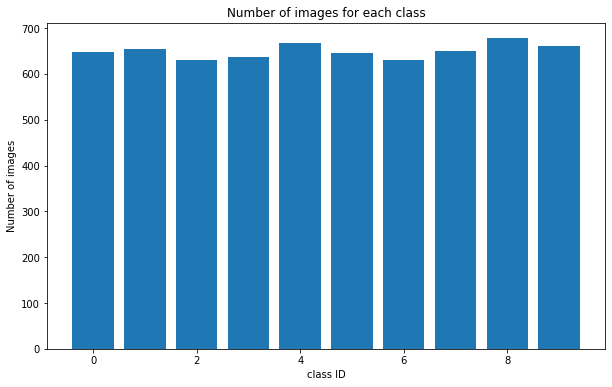

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(range(0,10),no_samples)
plt.title("Number of images for each class")
plt.xlabel("class ID")
plt.ylabel("Number of images")

In [ ]:
#prepare an image for preprocessing
def preprocessing(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=cv2.equalizeHist(img)
  img=img/255
  return img

In [ ]:
x_train=np.array(list(map(preprocessing,x_train)))
x_test=np.array(list(map(preprocessing,x_test)))
x_validation=np.array(list(map(preprocessing,x_validation)))

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_validation=x_validation.reshape(x_validation.shape[0],x_validation.shape[1],x_validation.shape[2],1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [ ]:
#augmentation

In [ ]:
dataGen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [ ]:
dataGen.fit(x_train)

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
y_validation=to_categorical(y_validation,10)

In [ ]:
def my_model():
  model=Sequential()
  model.add((Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu')))
  model.add((Conv2D(60,(5,5),activation='relu')))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add((Conv2D(30,(3,3),activation='relu')))
  model.add((Conv2D(30,(3,3),activation='relu')))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(10,activation='softmax'))
  # model.compile(adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model


In [ ]:
model=my_model()

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 30)         

In [ ]:
history=model.fit_generator(dataGen.flow(x_train,y_train,batch_size=50),steps_per_epoch=2000,epochs=10,validation_data=(x_validation,y_validation),shuffle=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
2000/2000 [==============================] - 68s 33ms/step - loss: 1.3929 - accuracy: 0.4982 - val_loss: 0.1555 - val_accuracy: 0.9502


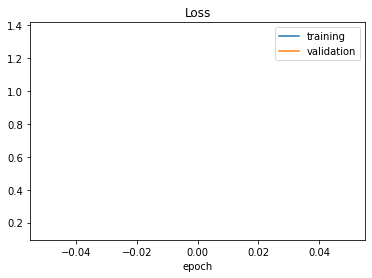

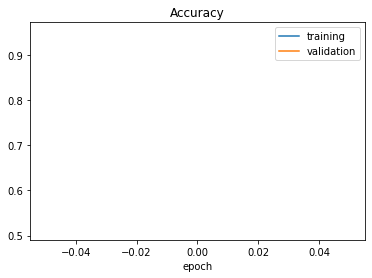

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
score

[0.16616295278072357, 0.9463582634925842]

In [ ]:
# import pickle
# outfile=open("model_pickle.p","wb")
# pickle.dump(model,open("model_pickle.p","wb"))
# outfile.close()

In [ ]:
model.save("text_detection.h5")

In [ ]:
#predicting results
pth="myData/0/img001-00020.png"



In [ ]:

img=cv2.imread(pth)
img=cv2.resize(img,(32,32))
# img=cv2.resize(img,(32,32))
img=preprocessing(img)
img=img.reshape(1,32,32,1)
classIndex=int(model.predict_classes(img))
print(classIndex)

0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#capture using camera and use that for predicting result
threshold=0.60
capture=cv2.VideoCapture(0)
capture.set(3,640)
capture.set(4,480)
while True:
  success,imgOriginal=capture.read()
  img=np.asarray(imgOriginal)
  img=cv2.resize(img,(32,32))
  img=preprocessing(img)
  cv2.imshow("preprocessed image...",img)
  img=img.reshape(1,32,32,1)
  classIndex=int(model.predict_classes(img))
  print(classIndex)#predict the class of image it belongs to
  predictions=model.predict(img)#predict the probability of all the classes
  print(predictions)
  probval=np.amax(predictions)#gives the maximum predictions
  print(probval)


  if probval>threshold:
    cv2.putText(imgOriginal,str(classIndex),(50,50),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,1,(0,0,255),1)

  cv2.imshow("Original Image",imgOriginal)
  if cv2.waitKey(1) & 0xFF==ord('q'):
    break